In [1]:
pip install pandas


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install numpy


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install seaborn 


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install matplotlib


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
d=pd.read_csv('Housing.csv')

In [8]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [9]:
d.head(7)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished


# converting into numeric data

In [10]:
map={'yes':1,'no':0}

In [11]:
d.mainroad=d.mainroad.map(map)
d.guestroom=d.guestroom.map(map)
d.basement=d.basement.map(map)
d.prefarea=d.prefarea.map(map)
d.airconditioning=d.airconditioning.map(map)
d.hotwaterheating=d.hotwaterheating.map(map)

In [12]:
d.furnishingstatus.value_counts()

furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64

In [13]:
map2={'semi-furnished':1,'unfurnished':0,"furnished":2}

In [14]:
d.furnishingstatus=d.furnishingstatus.map(map2)

# Corelation

In [15]:
cor=d.corr()

<Axes: >

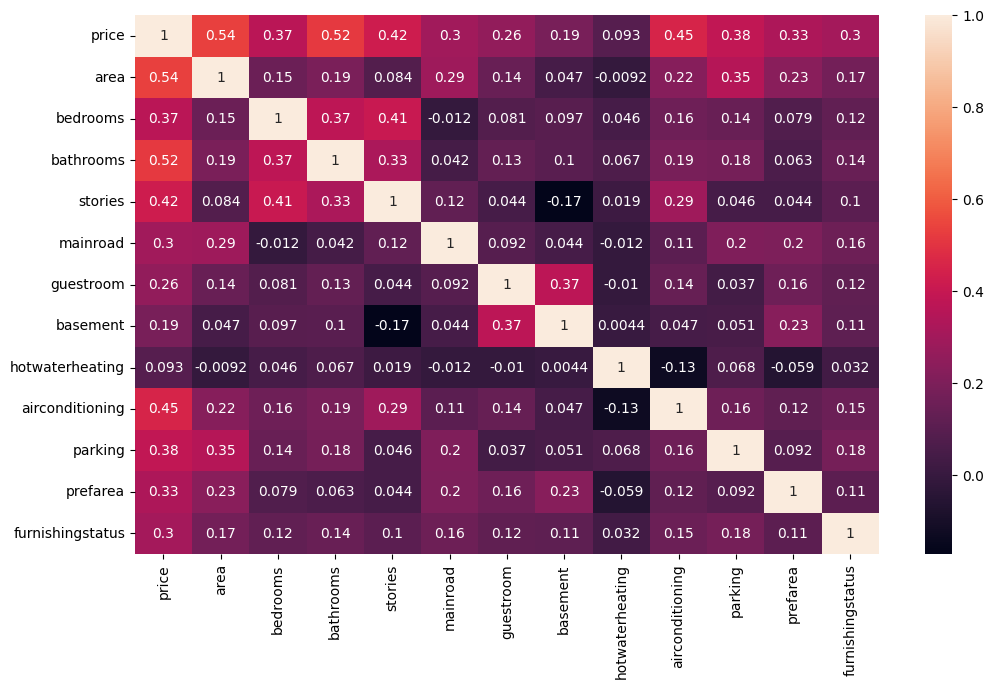

In [16]:
plt.figure(figsize=(12,7))
sns.heatmap(cor,annot=True)

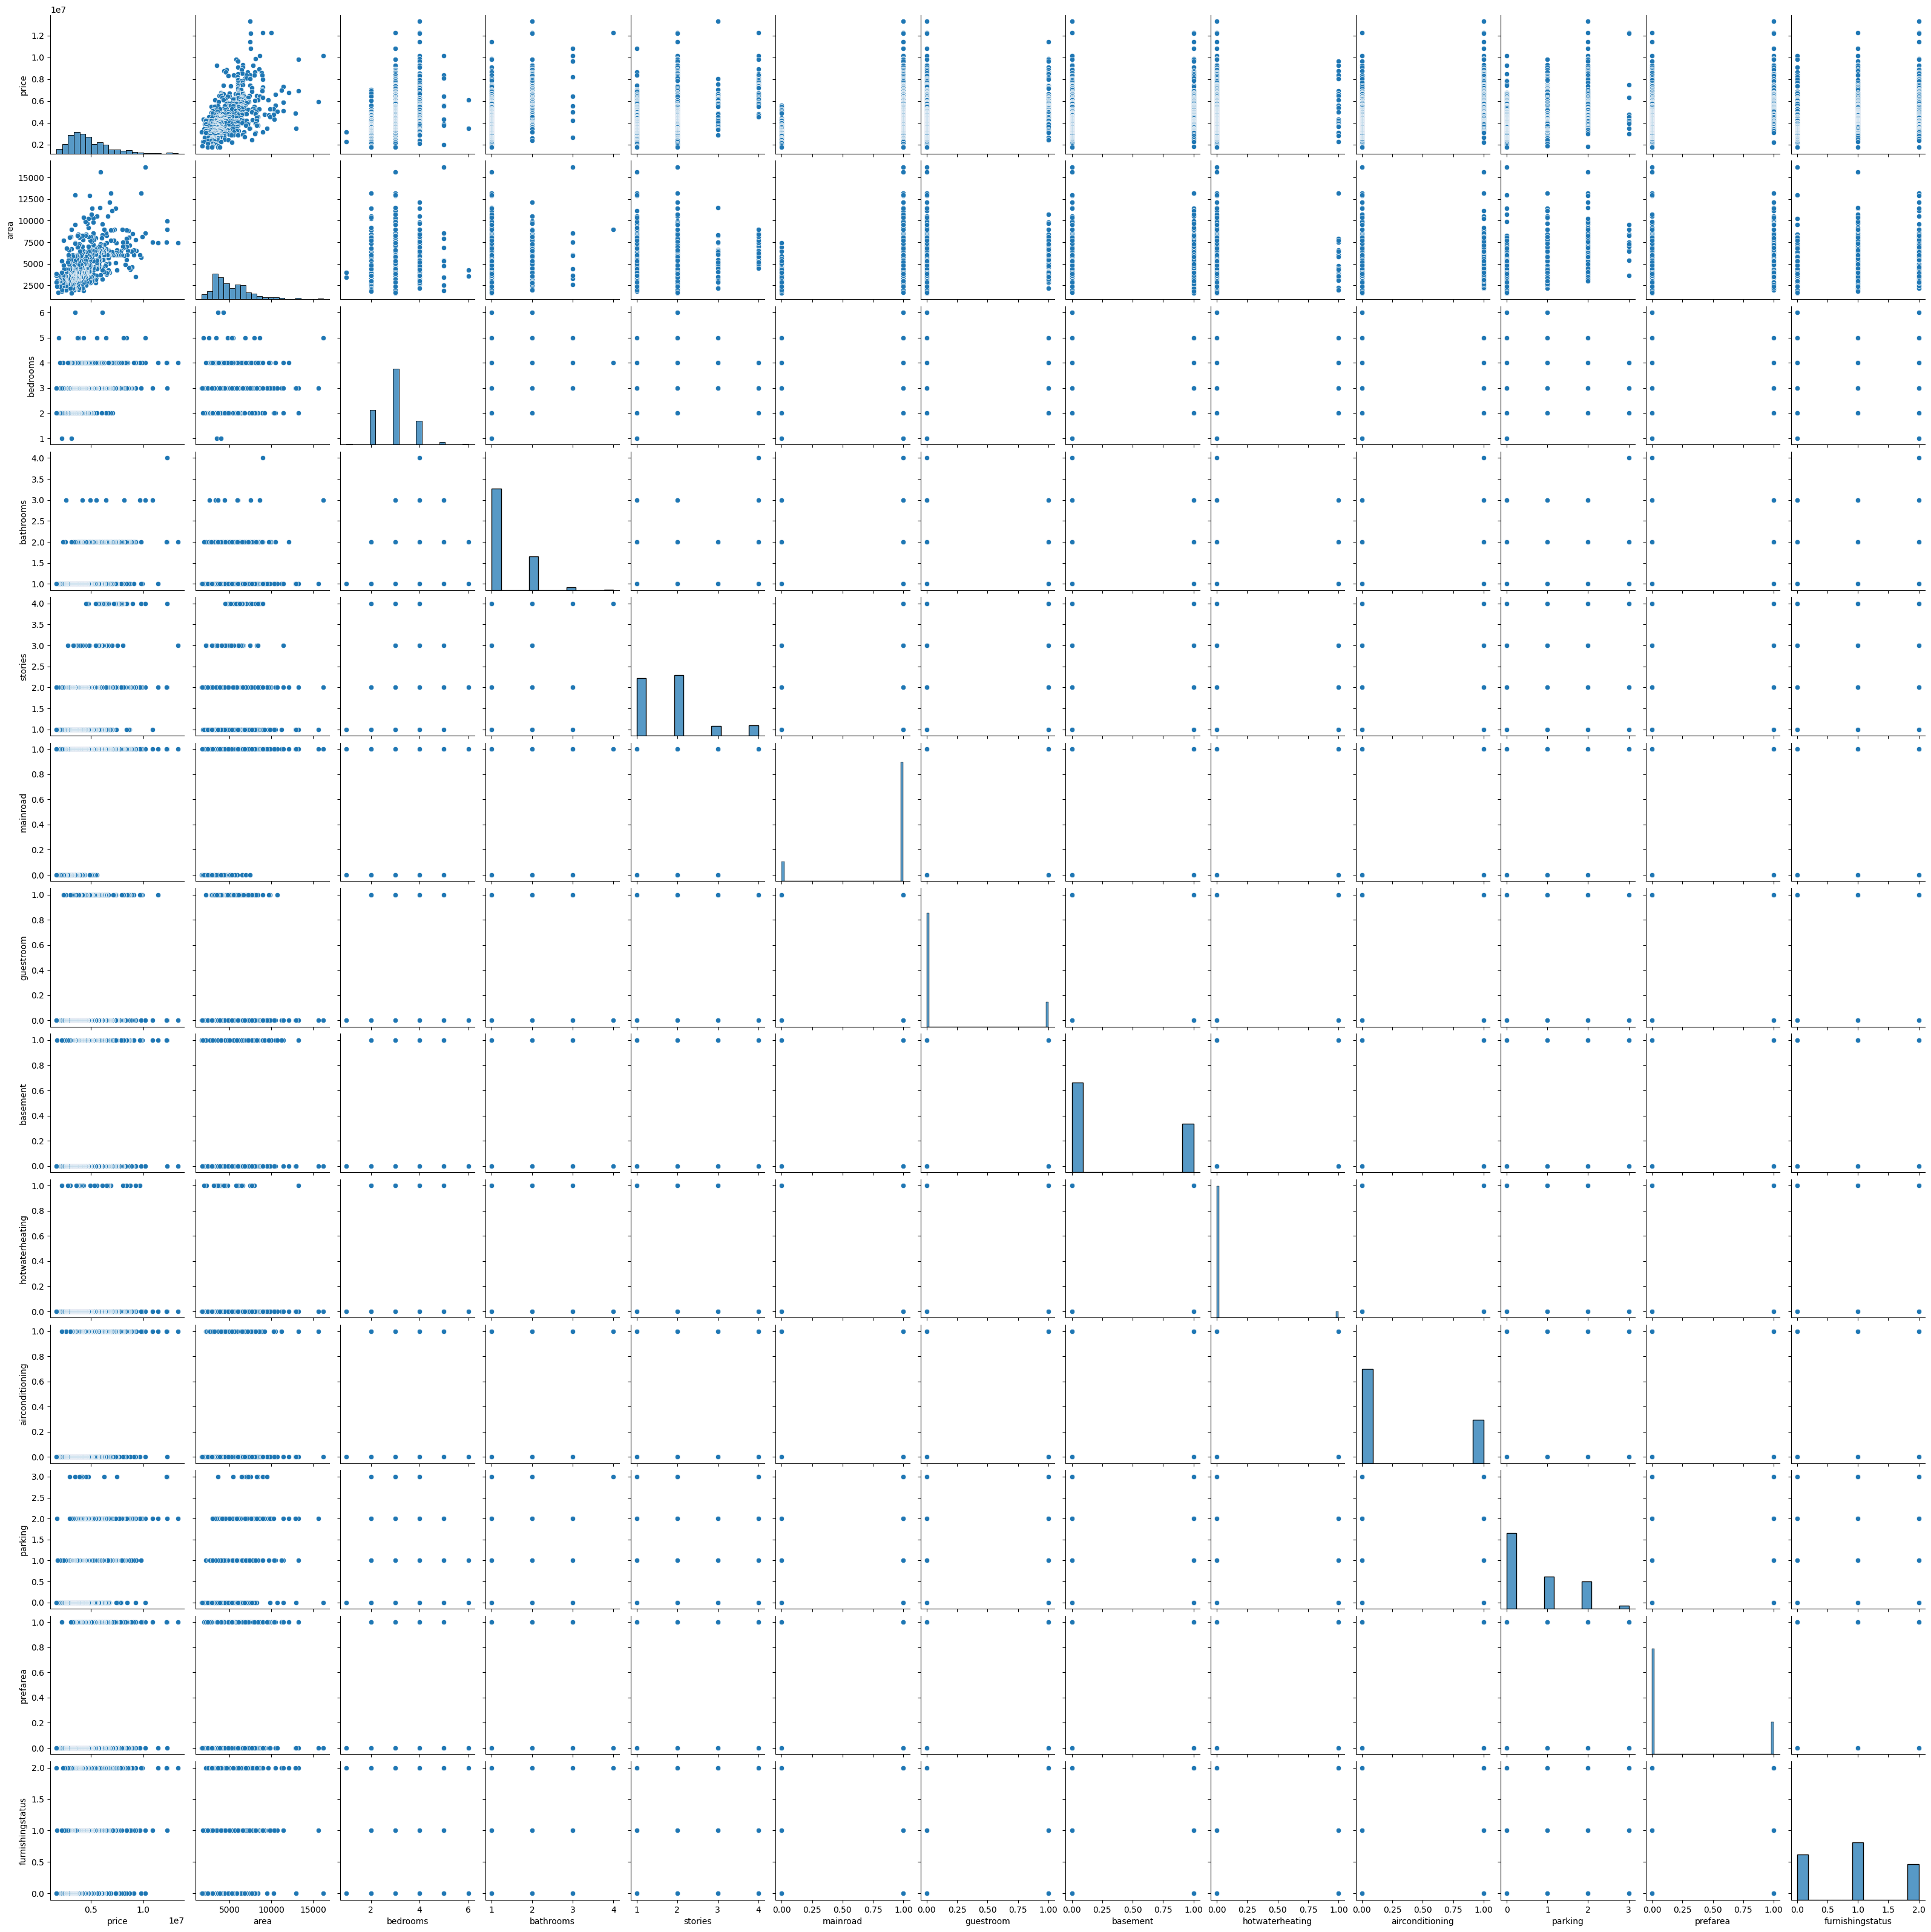

In [17]:
sns.pairplot(d)

# Training and testing data

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
d_train,d_test=train_test_split(d,random_state=22,test_size=0.2)

# Training LinearRegression Model

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
model=LinearRegression()

In [22]:
train_input=d_train[['area','bathrooms','bedrooms','stories','basement','mainroad','guestroom','airconditioning','parking','prefarea','furnishingstatus']]
train_target=d_train['price']
model.fit(train_input,train_target)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [23]:
test_input=d_test[['area','bathrooms','bedrooms','stories','basement','mainroad','guestroom','airconditioning','parking','prefarea','furnishingstatus']]
test_output=d_test['price']

In [24]:
prediction=model.predict(test_input)

In [25]:
prediction

array([5597177.91424847, 4048587.4993392 , 2151386.85767858,
       6001100.99499539, 3933164.22140367, 7437326.73572842,
       6263970.32236729, 7433753.79539892, 5038676.49134753,
       5199055.0503697 , 7421233.09035655, 5231376.35514289,
       4560774.06789482, 5185884.15678347, 4748167.47249228,
       5759664.10838218, 3536310.92117992, 7782440.7210749 ,
       3579792.17069311, 3284359.98118348, 3111993.92946936,
       4074575.40642738, 5182107.72748316, 4682389.26021874,
       3555231.64163232, 3832676.18643447, 7525916.78563207,
       3227545.39947408, 4145440.87071129, 6014626.46034617,
       3008949.34919085, 3586394.61231845, 3690698.95780764,
       3335216.82100337, 2849457.0787626 , 3157780.22623734,
       4488771.28253034, 6950977.9400578 , 3272852.05278532,
       3608077.92512343, 5075915.78809608, 2717965.16666037,
       3452379.0041322 , 4762605.74768809, 5171079.72646642,
       5381955.49349173, 2677963.1856754 , 6084246.41156759,
       4040997.0261656 ,

# Evaluating Model

In [26]:
from sklearn.metrics import root_mean_squared_error

In [27]:
def rmse(x,y):
    return root_mean_squared_error(x,y)

In [28]:
loss=rmse(test_output,prediction)
print('loss:',loss)

loss: 1141245.126650685


In [29]:
test_output

178    5229000
228    4690000
501    2660000
22     8645000
204    4900000
        ...   
122    5950000
262    4445000
268    4382000
67     6895000
120    5950000
Name: price, Length: 109, dtype: int64

In [30]:
d_test

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
178,5229000,7085,3,1,1,1,1,1,0,0,2,1,1
228,4690000,3630,3,1,2,1,0,0,0,0,2,0,1
501,2660000,2430,3,1,1,0,0,0,0,0,0,0,0
22,8645000,8050,3,1,1,1,1,1,0,1,1,0,2
204,4900000,4770,3,1,1,1,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,5950000,6254,4,2,1,1,0,1,0,0,1,1,1
262,4445000,3750,2,1,1,1,1,1,0,0,0,0,1
268,4382000,4950,4,1,2,1,0,0,0,1,0,0,1
67,6895000,7700,3,2,1,1,0,0,0,0,2,0,0


<Axes: ylabel='price'>

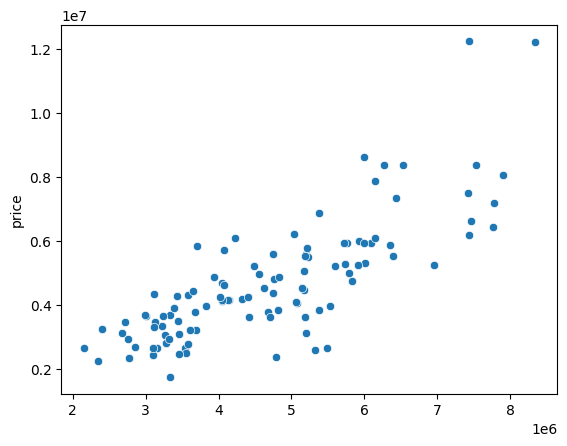

In [31]:
sns.scatterplot(y=test_output,x=prediction)

### This graph shows that model has made poor predictions since the gaph is not a straight line.

C:\Users\Rajesh Gupta\AppData\Local\Temp\ipykernel_11540\3822336011.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test_output)


<Axes: xlabel='price', ylabel='Density'>

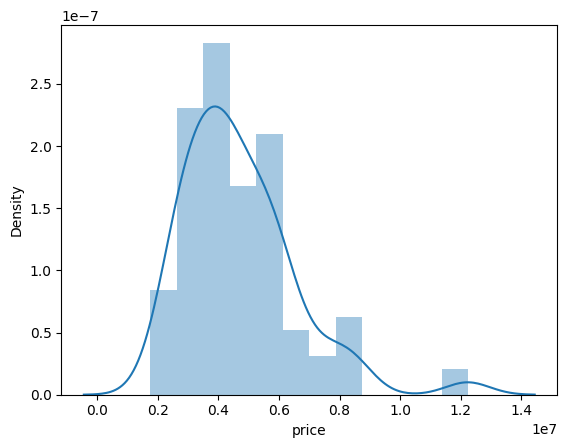

In [32]:
sns.distplot(test_output)

C:\Users\Rajesh Gupta\AppData\Local\Temp\ipykernel_11540\1367089904.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=prediction)


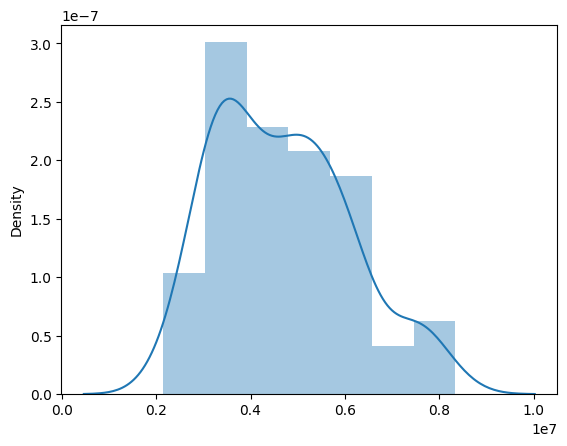

In [33]:
sns.distplot(x=prediction)
plt.show()

### There is a significant difference between the actual price graph and the model predicted price graph.